/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


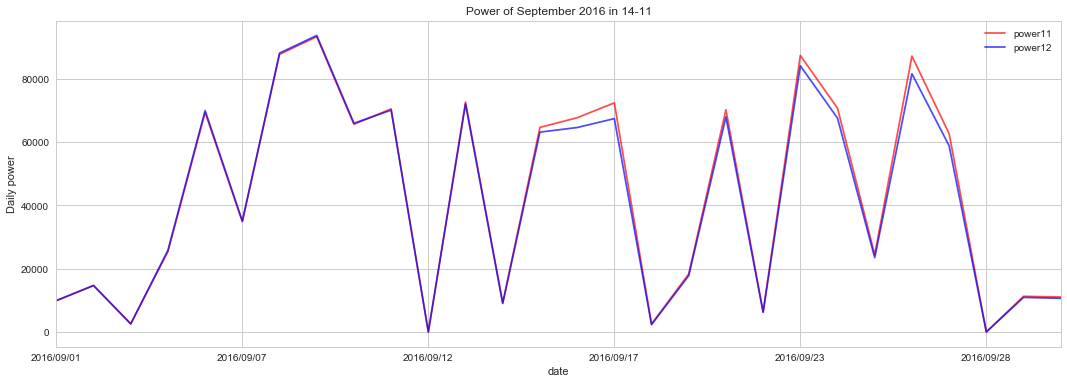

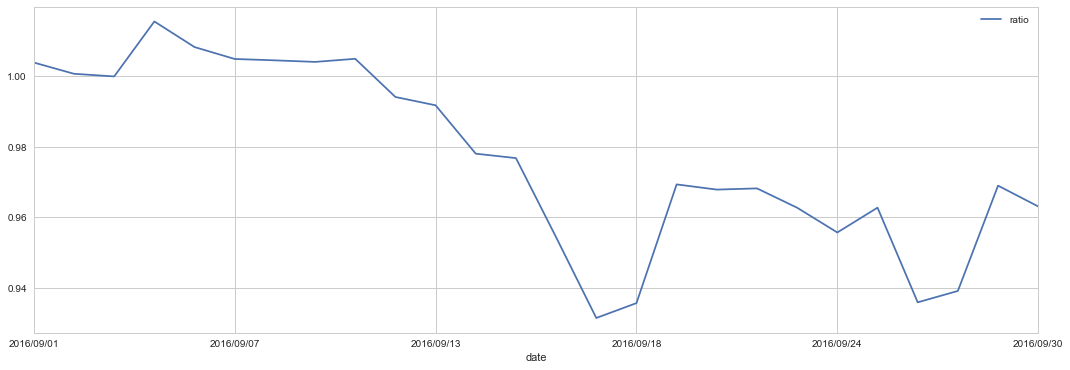

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from  datetime import datetime
import datetime

string_data = pd.read_csv('14-11_201609.csv', encoding="shift-jis")
string_data2 = string_data.rename(columns={"計測日時": "created", "ストリング11の電力(W)": "power11", "ストリング12の電力(W)": "power12"})
string_data3 = string_data2.ix[:,['created', 'power11', 'power12']]
string_data4 = string_data3.dropna()

dates = []
for created_time in string_data4.created:
    date = datetime.datetime.strptime(created_time, '%Y/%m/%d %H:%M:%S').strftime('%Y/%m/%d')
    dates.append(date)

string_data4['date'] = dates
string_data5 = string_data4.drop('created', axis = 1)
string_data6 = string_data5.groupby('date').sum()

string_data6['ratio'] = (string_data6['power12'] / string_data6['power11'])
string_data7 = string_data6.drop(['power11', 'power12'], axis = 1).dropna()

colorlist = ['#FF0000', '#0000FF']
string_data6.plot( y=['power11', 'power12'], figsize=(18,6), alpha=0.7, color=colorlist)
plt.ylabel("Daily power") 
plt.title("Power of September 2016 in 14-11")

string_data7.plot( y=['ratio'], figsize=(18,6), alpha=1)

In [3]:
string_data6

,power11,power12,ratio
date,,,
2016/09/01,9887.0,9926.0,1.003945
2016/09/03,14685.0,14696.0,1.000749
2016/09/04,2565.0,2565.0,1.000000
2016/09/05,25424.0,25821.0,1.015615
2016/09/06,69410.0,69989.0,1.008342
2016/09/07,34890.0,35063.0,1.004958
2016/09/08,87767.0,88168.0,1.004569
2016/09/09,93363.0,93748.0,1.004124
2016/09/10,65669.0,65998.0,1.005010
